# Premier modèle

In [1]:
import pandas as pd
import numpy as np
data_=pd.read_csv('house_data.csv')

In [2]:
data_.head() # Affichage de quatre premieres lignes de mon dataset

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [3]:
data_.isnull().sum() # Vérification des valeurs manquantes

price             0
surface           5
arrondissement    5
dtype: int64

In [4]:
data=data_.dropna() # Suppression des valeurs manquantes
data.isnull().sum() # Vérification à nouveau des valeurs manquantes

price             0
surface           0
arrondissement    0
dtype: int64

In [5]:
data.describe().T # Affichage de la statistique de notre dataset

,count,mean,std,min,25%,50%,75%,max
price,822.0,2010.306569,1895.091794,390.0,1052.500,1564.5,2348.0,25000.0
surface,822.0,58.045925,44.827522,10.0,28.655,46.1,73.0,415.0
arrondissement,822.0,4.142336,3.202151,1.0,2.000,3.0,4.0,10.0


In [6]:
X=data.drop(columns='price').values # Recuperation de nos features et passage en numpy
y=data[['price']].values # Recuperation de notre target et passage en numpy

## Faire du centrage-reduction de nos données

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.fit_transform(X)

In [9]:
scaler.fit(y)
y=scaler.fit_transform(y)

## Visualisation de nos données, Loyer en fonction du Prix

Text(0, 0.5, 'Price')

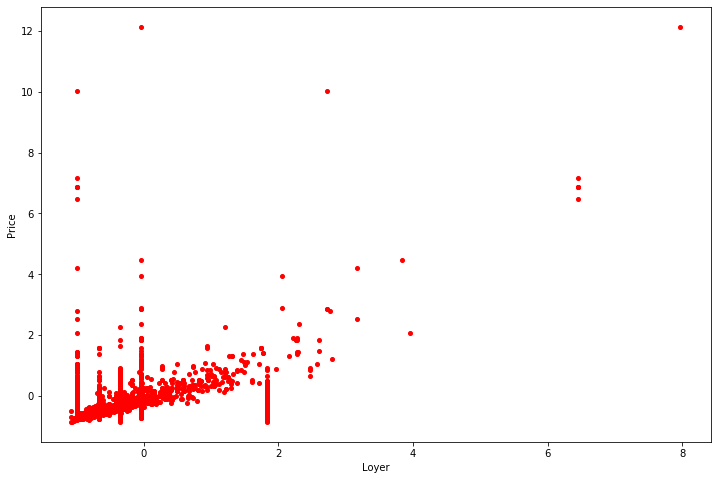

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(X,y,'ro',markersize=4)
plt.xlabel('Loyer')
plt.ylabel('Price')

## Faire le split en training et testing set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [13]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(lm.intercept_) 
print('\n')
print(lm.coef_)

[0.00512713]


[[ 0.87008463 -0.09015026]]


In [15]:
y_pred=lm.fit(X_train, y_train).predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,y_pred)
print('erreur effectuée par notre premier modèle est de: ',error)

erreur effectuée par notre premier modèle est de:  0.19189169890116667


# Deuxième modèle

In [17]:
data1=pd.read_csv('house_data.csv')

In [18]:
data1['arrondissement'].mode() # Calcul du mode de la colonne arrondissement

0    4.0
dtype: float64

In [19]:
data1['arrondissement']=data1['arrondissement'].fillna(4) #On remplace les valeurs manquantes de la
#colonne arrondissement par son mode

In [20]:
data1['surface']=data1['surface'].fillna(data1['surface'].mean()) #On remplace les valeurs manquantes de la
#colonne surface par sa moyenne

In [21]:
data1.isna().sum() # Vérification des valeurs manquantes

price             0
surface           0
arrondissement    0
dtype: int64

In [22]:
X=data1.drop(columns='price').values # Recuperation de nos features et passage en numpy
y=data1[['price']].values # Recuperation de notre target et passage en numpy

## Faire du centrage-reduction de nos données

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.fit_transform(X)

In [25]:
scaler.fit(y)
y=scaler.fit_transform(y)

## Visualisation de nos données, Loyer en fonction du Prix

Text(0, 0.5, 'Price')

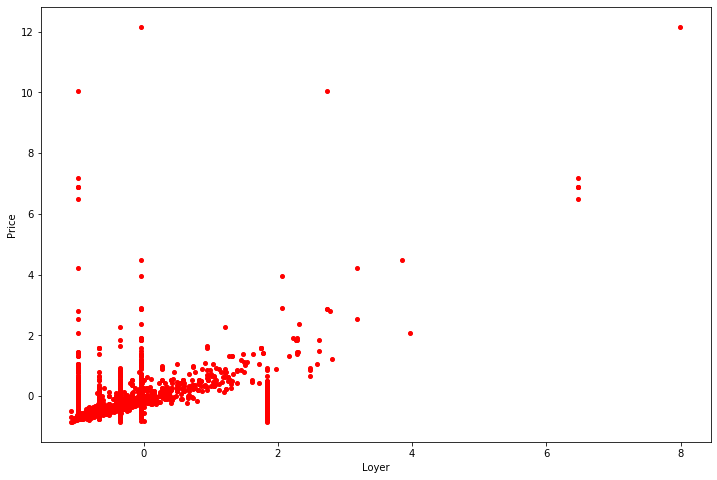

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(X,y,'ro',markersize=4)
plt.xlabel('Loyer')
plt.ylabel('Price')

## Faire le split en training et testing set

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [28]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(lm.intercept_) 
print('\n')
print(lm.coef_)

[0.0175601]


[[ 0.92460726 -0.09431395]]


In [30]:
y_pred=lm.fit(X_train, y_train).predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,y_pred)
print('erreur effectuée par notre deuxième modèle est de: ',error)

erreur effectuée par notre deuxième modèle est de:  0.095639929583784


### Après tout cela, nous constatons que le deuxième modèle donne une meilleure performance car le MSE de ce modèle est très proche de 0, (MSE=0.095639929583784). Contrairement à notre premier modèle qui une fois en supprimant les valeurs manquantes, ce modèle donne un MSE de 0.19189169890116667. MSE:Mean Squared Error. On peut donc dire qu'il n'est pas toujours judicieux de supprimer les valeurs manquantes car elles peuvent changer la prediction sur les données